In [68]:
# 1. IMPORTING NECESSARY LIBs FOR LIVER DISEASE PREDICTION
import pandas as pdLib
import matplotlib.pyplot as pltLib
import seaborn as snsLib
from sklearn.preprocessing import LabelEncoder as LabelEncoderLib , StandardScaler as StandardScalerLib
from imblearn.over_sampling import SMOTE as SMOTELib

from sklearn.linear_model import LogisticRegression as LogisticRegressionLib
from sklearn.ensemble import GradientBoostingClassifier as GradientBoostingClassifierLib
from sklearn.svm import SVC as SVCLib
from catboost import CatBoostClassifier as CatBoostClassifierLib
from sklearn.model_selection import train_test_split as train_test_split_Lib, cross_val_score as cross_val_score_Lib, StratifiedKFold as StratifiedKFoldLib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA as PCALib
from pandas.plotting import radviz
from pandas.plotting import andrews_curves as acs
from matplotlib.colors import LinearSegmentedColormap




In [9]:
# 2. LOADING DATA
ldMLData = pdLib.read_csv('LiverDiseaseDataset.csv')



In [11]:
# 3. DATA PREPROCESSING STARTS HERE
# Removing unnecessary columns
ldMLData.drop(columns=['Unnamed: 0'], inplace=True)
# Checking any null values
print(ldMLData.isnull().sum())

# Transgorm 'Sex' column 
ldMLData['Sex'] = ldMLData['Sex'].map({'m': 0, 'f': 1})
ldMLData.fillna(ldMLData.median(numeric_only=True) ,inplace=True)
ldMLData.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# EDA

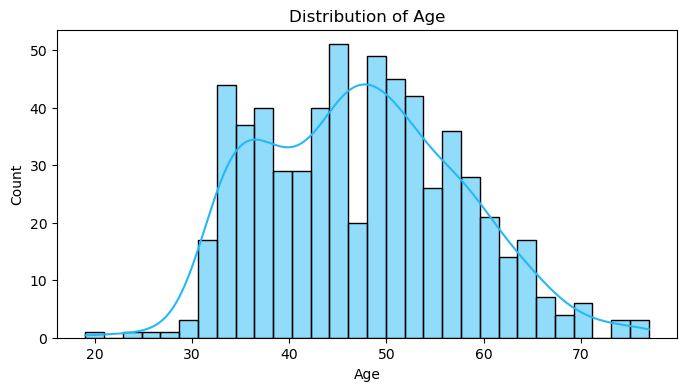

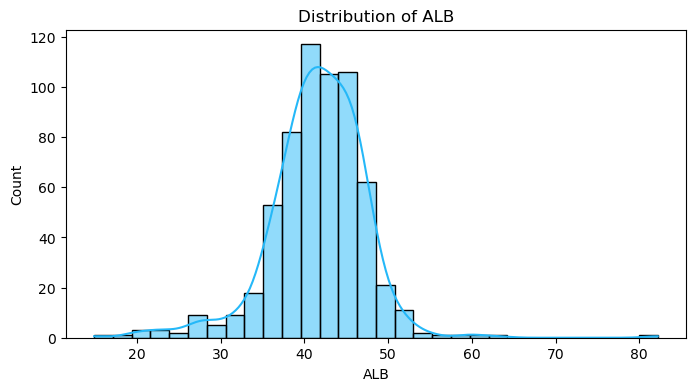

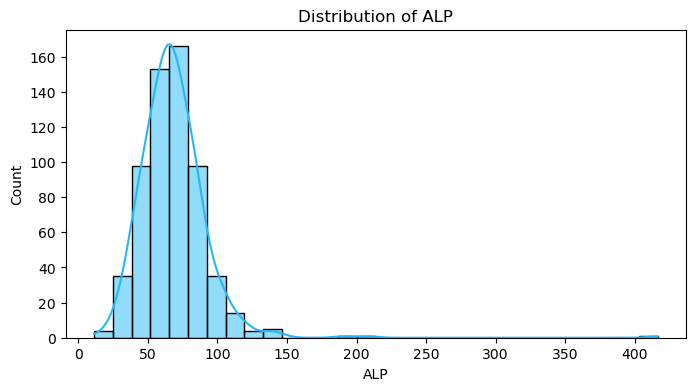

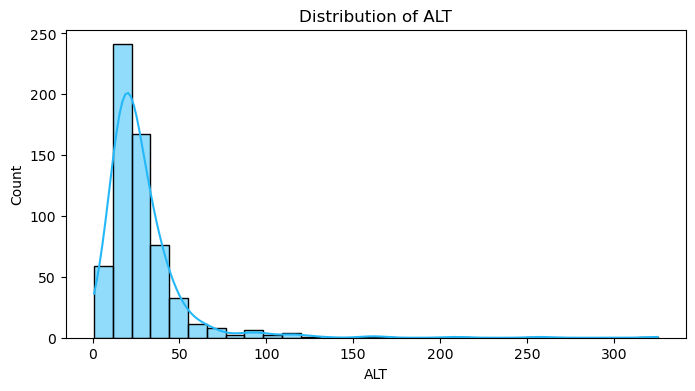

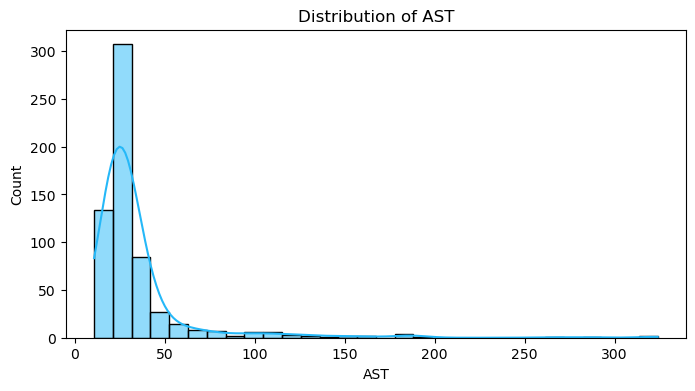

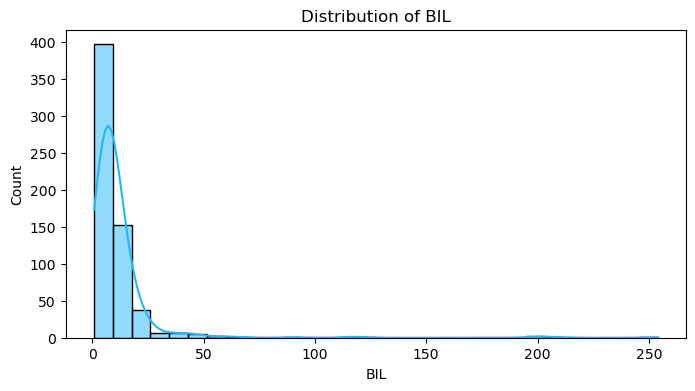

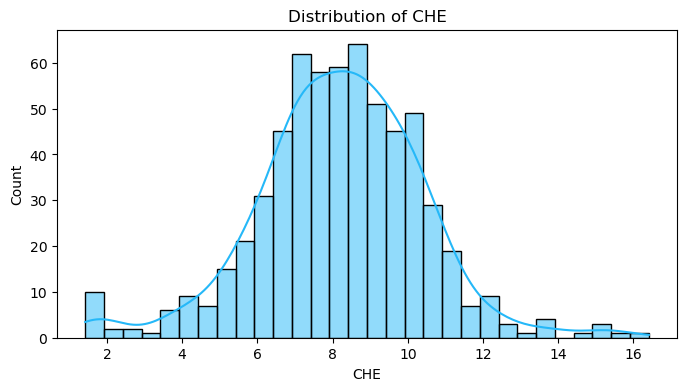

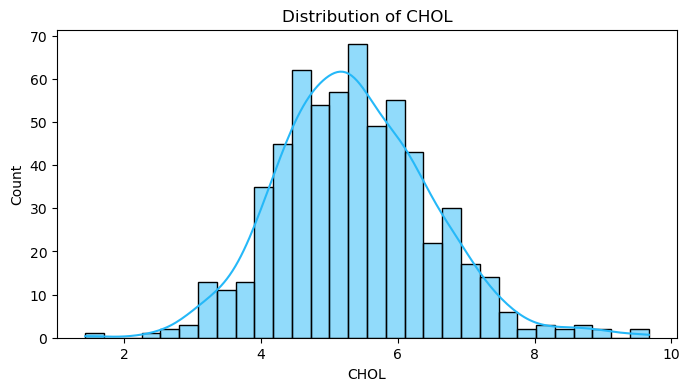

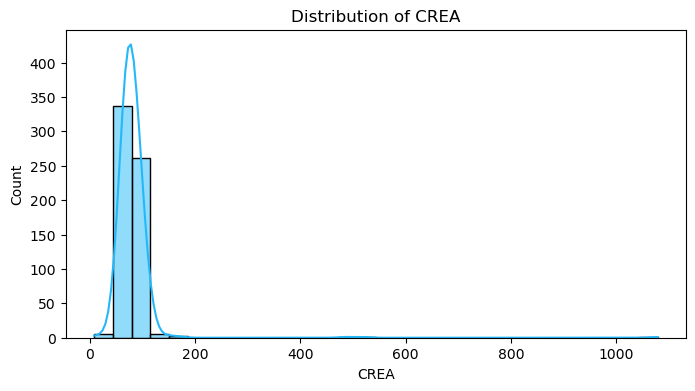

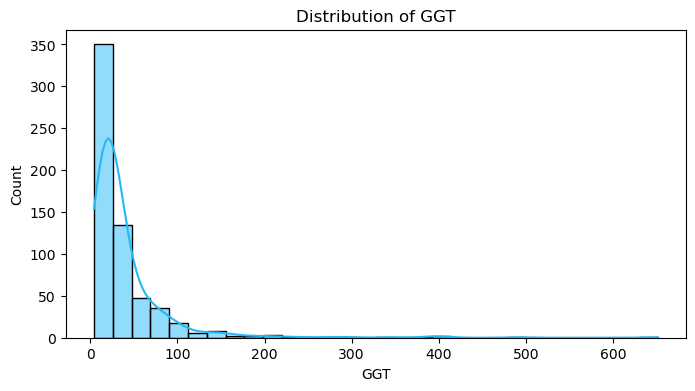

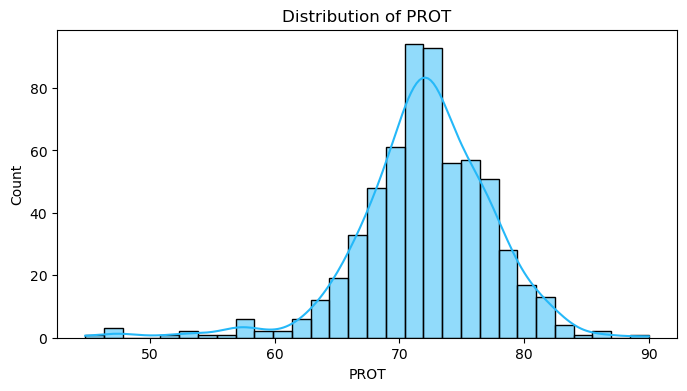

In [15]:
# 1. Every numerical column's value distribution

valueCols = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
# configuring a fixed color combo
lightBlueColor = '#25B8F8'
# Drawing histogram and setting KDE for each numeric feature
for i, eachColumn in enumerate(valueCols):
    pltLib.figure(figsize=(8, 4))
    snsLib.histplot(ldMLData[eachColumn], kde=True, bins=30, color=lightBlueColor)
    pltLib.title(f'Distribution of {eachColumn}')
    pltLib.xlabel(eachColumn)
    pltLib.ylabel('Count')
    pltLib.show()


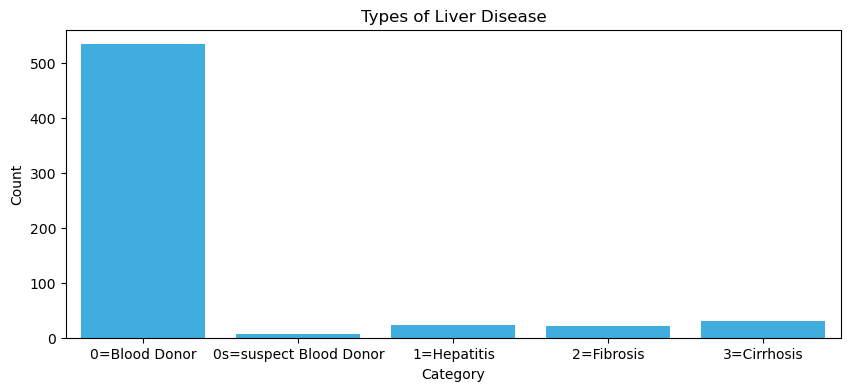

In [27]:
#2. Plot with single color for all bars
pltLib.figure(figsize=(10, 4))
snsLib.countplot(x='Category', data=ldMLData, color=lightBlueColor)
pltLib.title('Types of Liver Disease', color='black')
pltLib.xlabel('Category')
pltLib.ylabel('Count')
pltLib.show()

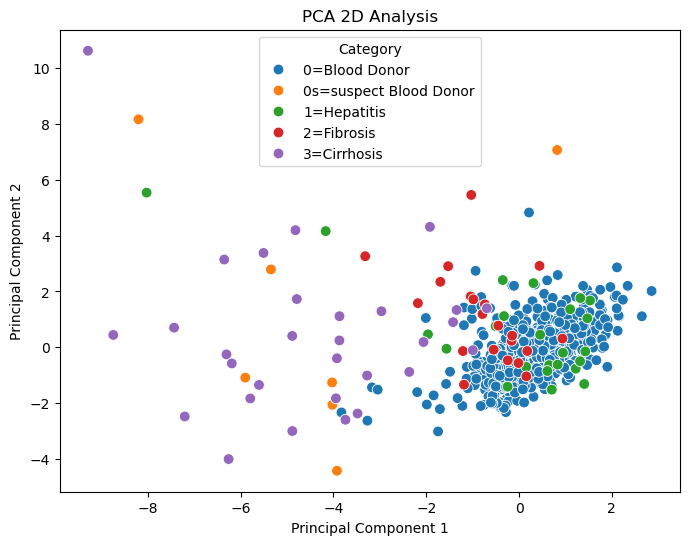

In [49]:
#3.  Select only numeric features for PCA
# Scale the features
stdValueScaler = StandardScalerLib()
scaledVals = stdValueScaler.fit_transform(ldMLData[valueCols])

# Apply PCA
pcanalyser = PCA(n_components=2)
pcmps = pcanalyser.fit_transform(scaledVals)

# Create a DataFrame for PCA results
pcaData = pdLib.DataFrame(data=pcmps, columns=['PC1', 'PC2'])
pcaData['Category'] = ldMLData['Category']

# Define custom palette
majClass = pcaData['Category'].value_counts().idxmax()  # Find the majority class
cat = pcaData['Category'].unique()

# Plot PCA results
pltLib.figure(figsize=(8,6))
snsLib.scatterplot(x='PC1', y='PC2', hue='Category', data=pcaData, s=60)
pltLib.title('PCA 2D Analysis', color='black')
pltLib.xlabel('Principal Component 1')
pltLib.ylabel('Principal Component 2')
pltLib.legend(title='Category')
pltLib.show()

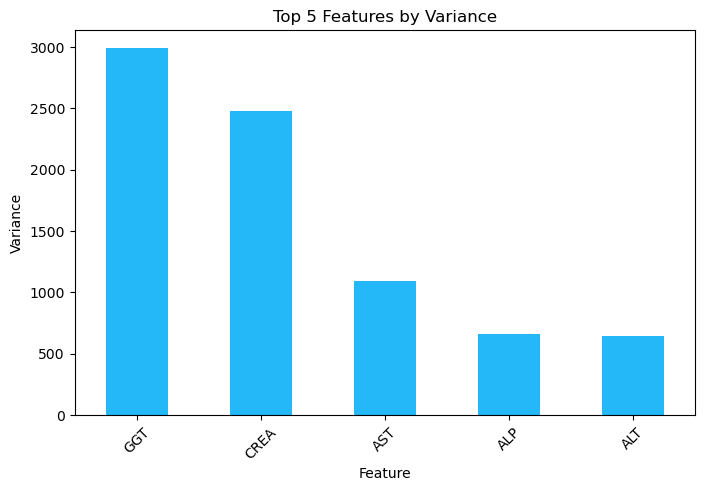

In [78]:
#4. Finding top 5 features
ftVar = ldMLData[['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']].var()

# Sort and select top 5 variables
best5Fts = ftVar.sort_values(ascending=False).head(5)

# Plot with custom color
pltLib.figure(figsize=(8,5))
best5Fts.plot(kind='bar', color='#25B8F8')
pltLib.title('Top 5 Features by Variance', color='black')
pltLib.ylabel('Variance')
pltLib.xlabel('Feature')
pltLib.xticks(rotation=45)
pltLib.show()


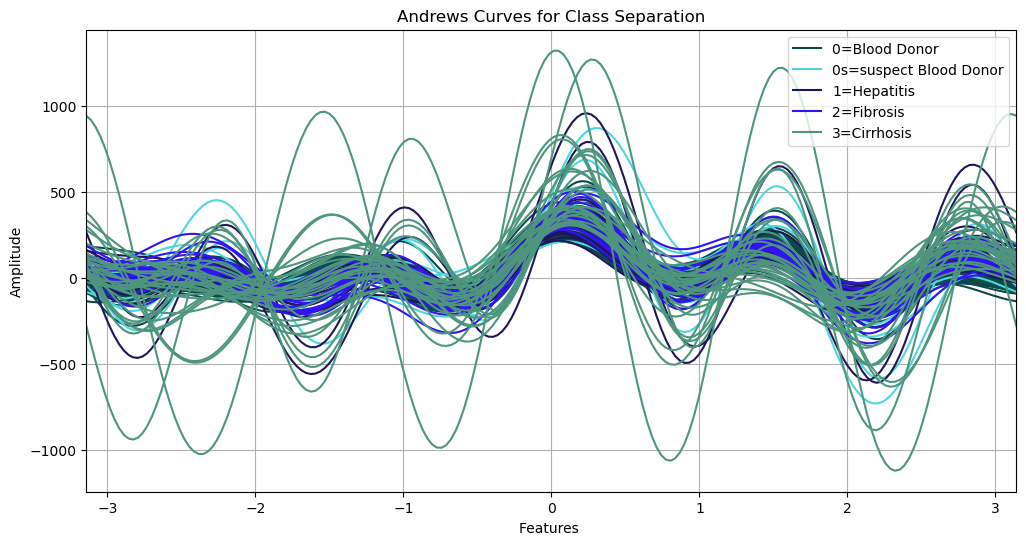

In [55]:

# 5. select numeric and target values
impColumns = ['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT', 'Category']

# manual color list 
custom_colors = ['#0B494B', '#4DD7DD', '#1F1659', '#3113F5', '#4D957D']

# displaying img
pltLib.figure(figsize=(12,6))
acs(ldMLData[impColumns], 'Category', color=custom_colors)
pltLib.title('Andrews Curves for Class Separation', color='black')
pltLib.xlabel('Features ')
pltLib.ylabel('Amplitude')
pltLib.show()


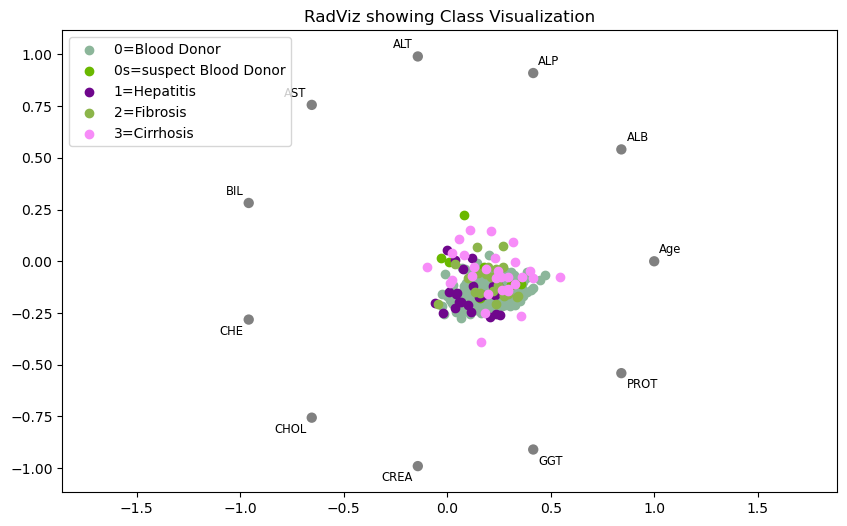

In [61]:


#6, RadViz
pltLib.figure(figsize=(10,6))
radviz(ldMLData[impColumns], 'Category')
pltLib.title('RadViz showing Class Visualization')
pltLib.show()

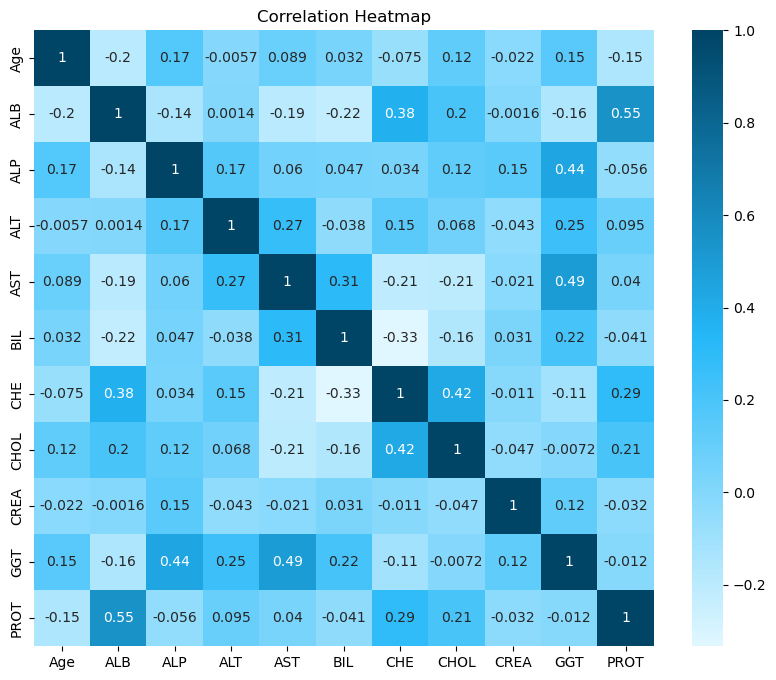

In [76]:

# 7, Correlations analysis
necessaryColumns = ldMLData.drop(columns=['Sex', 'Category'])
colorCombo = LinearSegmentedColormap.from_list('custom_blue', ['#E0F7FF', base_color, '#004466'])

pltLib.figure(figsize=(10,8))
snsLib.heatmap(necessaryColumns.corr(), annot=True, cmap=colorCombo)
pltLib.title('Correlation Heatmap')
pltLib.show()